In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [35]:
# loading data and sorting
data=pd.read_csv("../data/NSE-Tata-Global-Beverages-Limited.csv")
dataTata=data.sort_index(ascending=True,axis=0)
new_datasetTata=pd.DataFrame(index=range(0,len(data)),columns=['Date','Close'])
for i in range(0,len(dataTata)):
    new_datasetTata["Date"][i]=dataTata['Date'][i]
    new_datasetTata["Close"][i]=dataTata["Close"][i]

In [36]:
# Normalizing Dataset
new_datasetTata.index=new_datasetTata.Date
new_datasetTata.drop("Date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_datasetTata.values

train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]


scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [49]:
# Building our LSTM model 

lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam', metrics='accuracy')


In [50]:
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

927/927 - 24s - loss: 0.0028 - accuracy: 0.0022 - 24s/epoch - 26ms/step


In [53]:
# Predicting Values
inputs_data=new_datasetTata[len(new_datasetTata)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

train_data=new_datasetTata[:987]
valid_data=new_datasetTata[987:]
valid_data['Predictions']=predicted_closing_price;


8/8 [==============================] - 1s 14ms/step


/tmp/ipykernel_11414/75657978.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price;


## Plotting Results

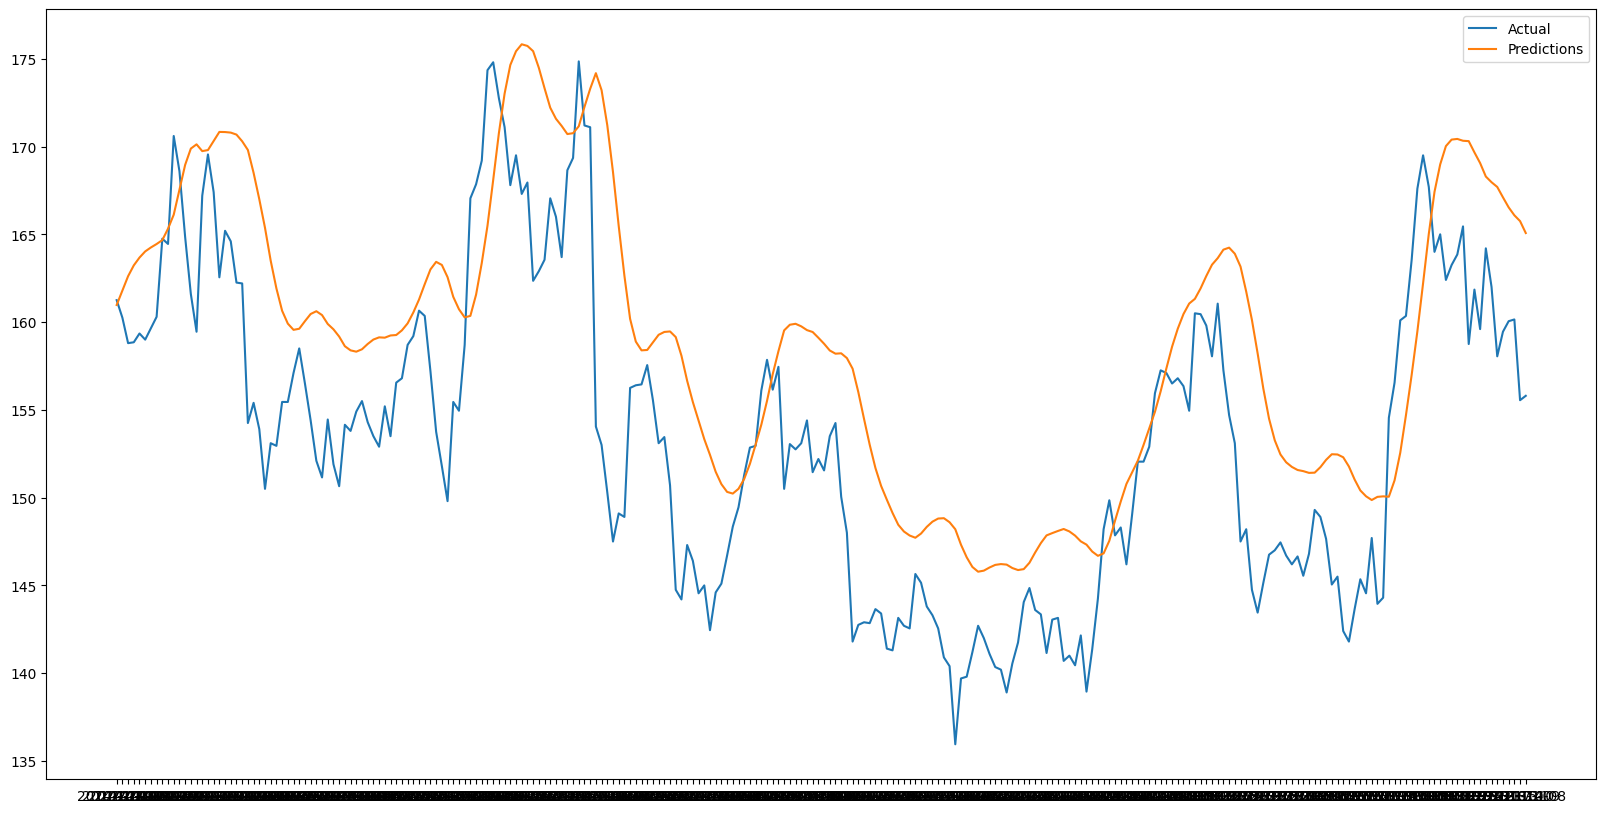

In [57]:
plt.plot(valid_data[['Close',"Predictions"]]);
plt.legend(['Actual',"Predictions"])
plt.show();

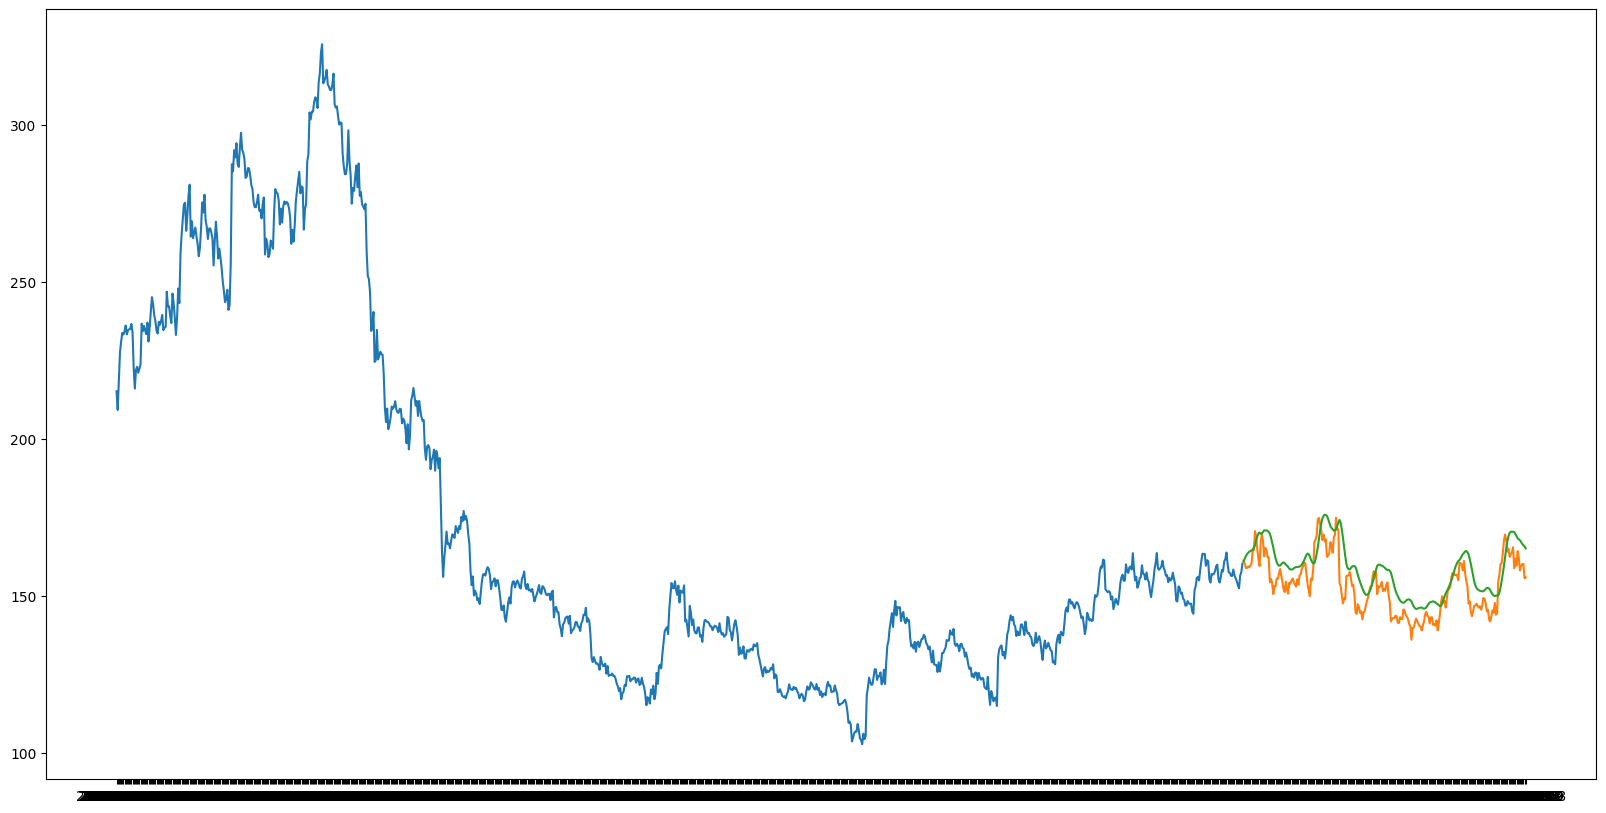

In [55]:
plt.plot(train_data["Close"]);
plt.plot(valid_data[['Close',"Predictions"]]);